# Outlier Removal using IQR

Three points which divide the total data into four equal partswhen it has been orderly arranged are known as Quartiles

Q1-first Quartile, Q2- second Quartile, Q3-third Quartile

 Interquartile Range (IQr) 
 The data range that contains the middle 50% of the entries 
 
 IQR = Q3-Q1
 
 The value which are below Q1-1.5IQR or above Q3+1.5IQR are outliers. 
 
 This is called the 1.5*IQR rule

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 

In [3]:
data = pd.read_csv("scholarship.csv")

In [4]:
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


C:\Users\Sneha Agarwal\AppData\Local\Temp\ipykernel_9400\828206924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])
C:\Users\Sneha Agarwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

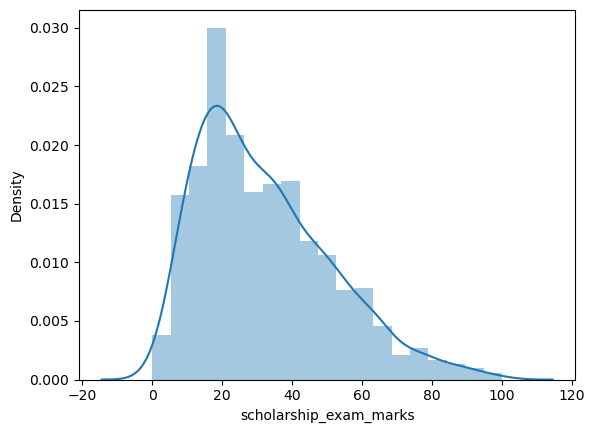

In [5]:
sns.distplot(data["scholarship_exam_marks"])

<Axes: >

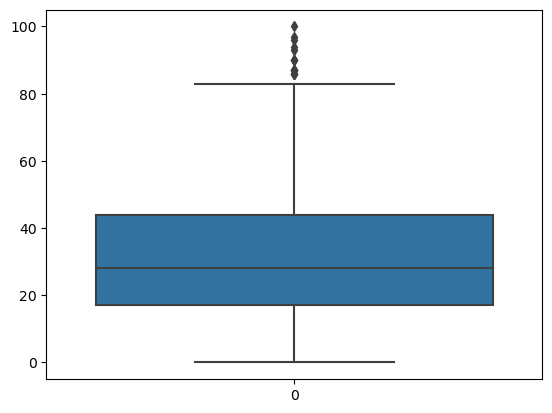

In [6]:
sns.boxplot(data["scholarship_exam_marks"])

In [7]:
Q1 = data["scholarship_exam_marks"].quantile(0.25)
Q3 =data["scholarship_exam_marks"].quantile(0.75)

In [8]:
Q1

17.0

In [9]:
Q3

44.0

In [11]:
IQR = Q3-Q1
IQR

27.0

In [13]:
data.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.225000,0.489000
std,6.158979,19.130822,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,100.000000,1.000000


In [14]:
min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

In [15]:
min

-23.5

In [16]:
max

84.5

In [18]:
data[(data["scholarship_exam_marks"]<min) | (data["scholarship_exam_marks"]>max)]

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


## Trimming

In [22]:
new_data = data[(data["scholarship_exam_marks"]>min) & (data["scholarship_exam_marks"]<max) ]

C:\Users\Sneha Agarwal\AppData\Local\Temp\ipykernel_9400\2007280676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])
C:\Users\Sneha Agarwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sneha Agarwal\AppData\Local\Temp\ipykernel_9400\2007280676.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure

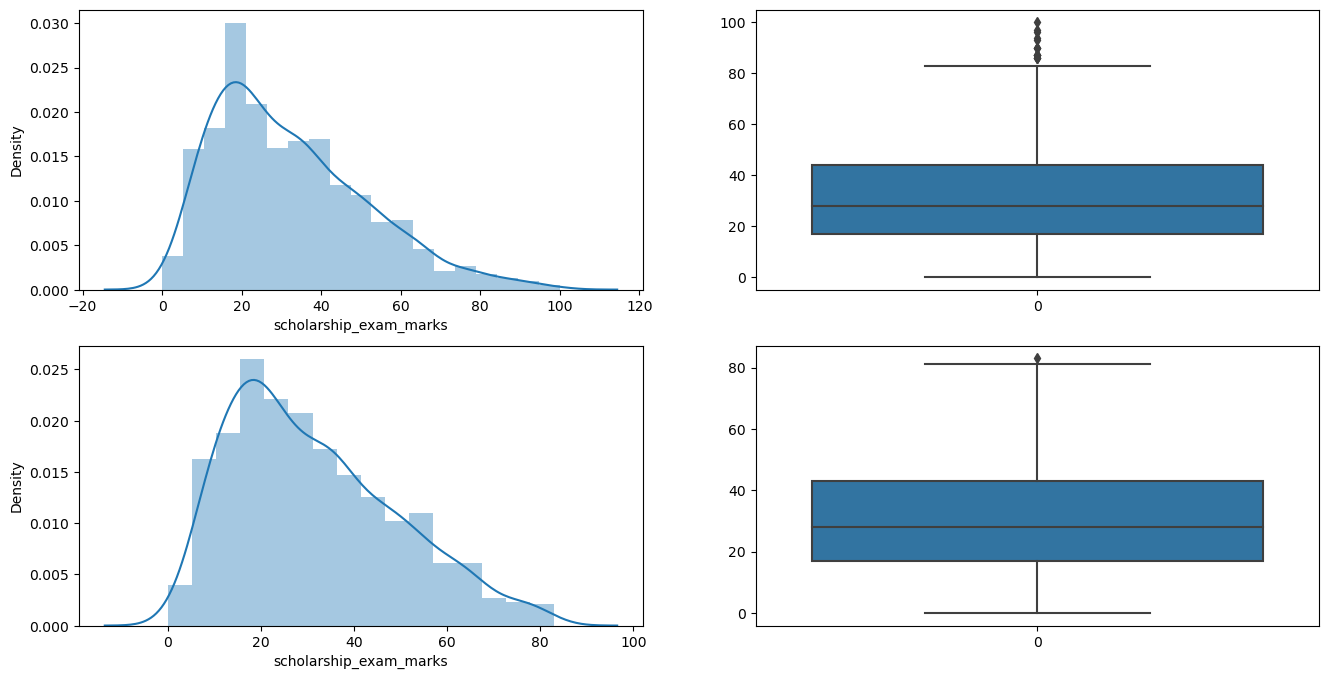

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data["scholarship_exam_marks"])

plt.subplot(2,2,2)
sns.boxplot(data["scholarship_exam_marks"])

plt.subplot(2,2,3)
sns.distplot(new_data["scholarship_exam_marks"])

plt.subplot(2,2,4)
sns.boxplot(new_data["scholarship_exam_marks"])

plt.show()

## Capping

In [24]:
data["scholarship_exam_marks"] = np.where(data["scholarship_exam_marks"]>max, max, 
                                         np.where(data["scholarship_exam_marks"]<min, min, data["scholarship_exam_marks"]))

In [25]:
data.shape

(1000, 3)

<Axes: >

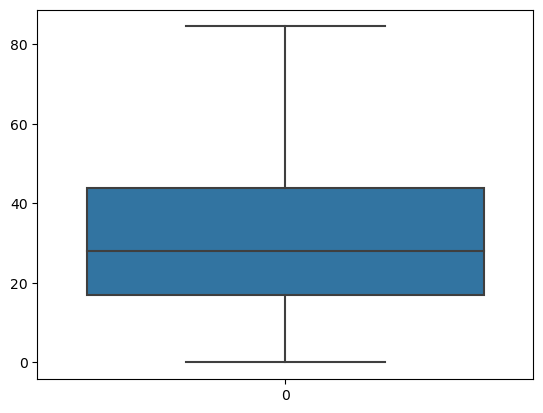

In [26]:
sns.boxplot(data["scholarship_exam_marks"])

# Outlier Removal using Percentile 

Percentile is a statistical measure that gives the percentage of data value that fall below a given data value

In [29]:
df=pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


C:\Users\Sneha Agarwal\AppData\Local\Temp\ipykernel_9400\1870637031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Height"])
C:\Users\Sneha Agarwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Density'>

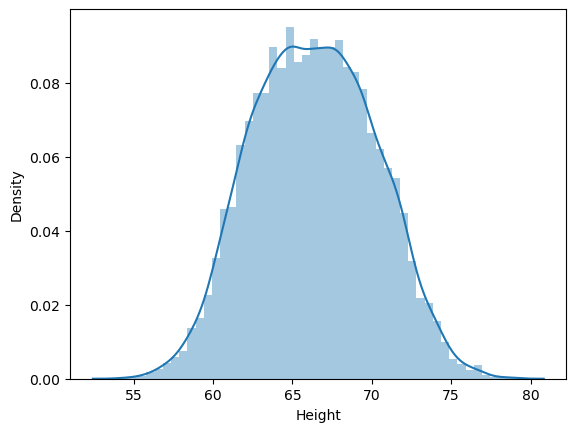

In [30]:
sns.distplot(df["Height"])

<Axes: >

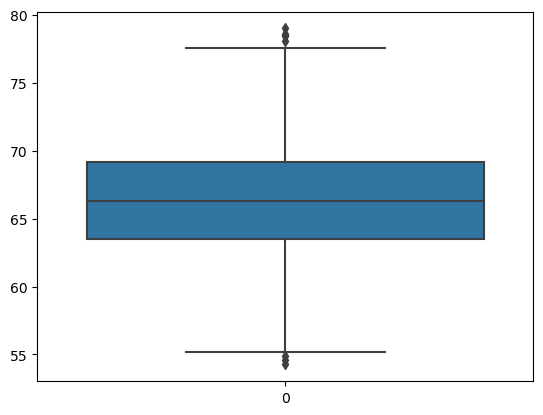

In [32]:
sns.boxplot(df["Height"])

In [33]:
min_limit = df["Height"].quantile(0.01)
max_limit = df["Height"].quantile(0.99)

In [35]:
min_limit

58.134411587100004

In [36]:
max_limit

74.7857900592

In [37]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


In [38]:
df[(df["Height"]>max_limit) | (df["Height"]<min_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924748
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


## Trimming

In [40]:
df_new = df[(df["Height"]<max_limit) & (df["Height"]>min_limit)]

<Axes: >

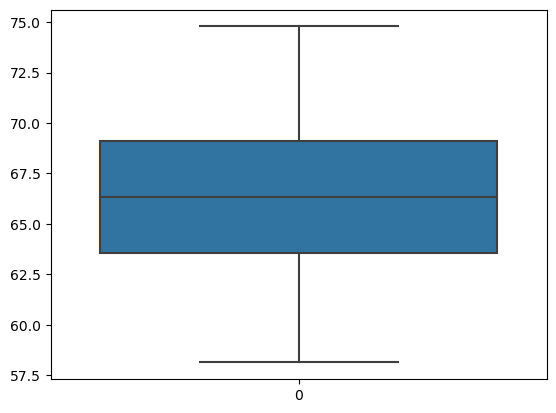

In [41]:
sns.boxplot(df_new["Height"])

## Capping

In [42]:
df["Height"] = np.where(df["Height"]>max_limit, max_limit,
                       np.where(df["Height"]<min_limit, min_limit, df["Height"]))

In [43]:
df.shape

(10000, 3)

<Axes: >

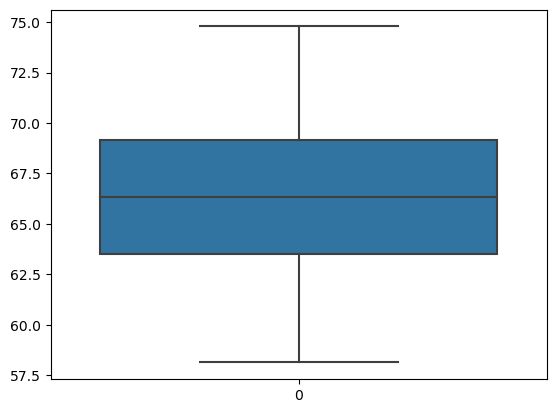

In [44]:
sns.boxplot(df["Height"])

## Correction of Datatype

In [45]:
df = pd.read_csv("AB_NYC_2019.csv")

In [46]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [50]:
df["id"]=df["id"].astype("str")

In [51]:
df["id"].dtype

dtype('O')

In [52]:
df["host_id"]=df["host_id"].astype("str")

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  object 
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  object 
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [54]:
df["host_id"]=df["host_id"].astype("int")

In [55]:
df["host_id"].dtype

dtype('int32')

In [56]:
df["last_review"] = pd.to_datetime(df["last_review"])

C:\Users\Sneha Agarwal\AppData\Local\Temp\ipykernel_9400\3465608367.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["last_review"] = pd.to_datetime(df["last_review"])


In [57]:
df["last_review"].dtype

dtype('<M8[ns]')